An autoencoder Consists of 3 parts:
    1. Encoder
    2. Bottleneck
    3. Decoder
    
Encoder/Decoder are fully connected feed foward neural networks
and the bottleneck is 
    

In [150]:
import os

import time
import torch
from torch import nn
from torchvision import transforms
import matplotlib.pyplot as plt
import datasets


#torch.set_default_tensor_type('torch.cuda.FloatTensor')
tensor_transform = transforms.ToTensor()


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [151]:
#datasets.MNIST()
from torchvision import datasets 

dataset = datasets.MNIST(root = "./data",
                         train = True,
                         download = True,
                         transform = tensor_transform)
 
loader = torch.utils.data.DataLoader(dataset=dataset,
                                     batch_size=12,
                                     shuffle= True,
                                     generator=torch.Generator(device='cuda'),)




First we will be constructing the encoder and decoder, 2 fully connected, feed forward Neural networks  

Encoder will gradually reduce dimentionality  
28*28=784 -> 128 -> 64 -> 36 -> 18 -> 9
  
Decoder will do the opposite


In [152]:

class autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        
        #Encoder 
        self.encoder = nn.Sequential(
            nn.Linear(28*28,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,36),
            nn.ReLU(),
            nn.Linear(36,18),
            nn.ReLU(),
            nn.Linear(18,9)
        )
        
        #Decoder
        self.decoder = nn.Sequential(
            nn.Linear(9, 18),
            nn.ReLU(),
            nn.Linear(18, 36),
            nn.ReLU(),
            nn.Linear(36, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )
        self.model = nn.Sequential(
            
            
        )
        
        
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
        
        

In [153]:

# Model Initialization
model = autoencoder()
model.to(device)
 
# Validation using MSE Loss function
loss_function = nn.MSELoss()

#Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model.parameters(),
                             lr = 1e-1,
                             weight_decay = 1e-8)



In [156]:
def plot():
    f, axarr = plt.subplots(2,2)

    for i, item in enumerate(image):

    # Reshape the array for plotting
        item = item.reshape(-1, 28, 28)
        axarr[0,0].imshow(item[0].cpu())

    for i, item in enumerate(reconstructed):
        item = item.reshape(-1, 28, 28).cpu()
        item = item.detach().numpy()
        axarr[0,1].imshow(item[0])


Epoch # 0
Epoch time:  62.88646864891052
ETA: 19.914048405488334
Epoch # 1
Epoch time:  59.96748757362366
ETA: 17.9902462720871
Epoch # 2


KeyboardInterrupt: 

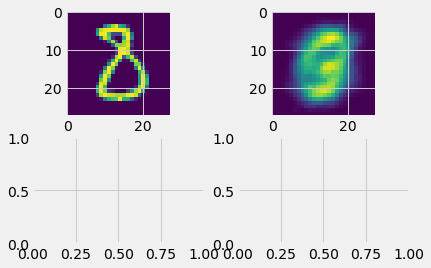

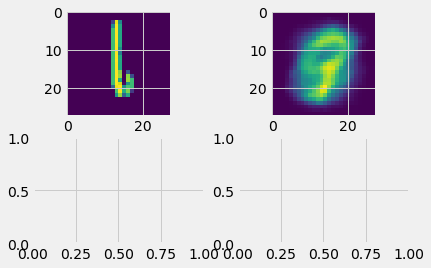

In [157]:
epochs = 20
outputs = []
losses = []


for epoch in range(epochs):
    print('Epoch #',epoch)
    start = time.time()
    
    for (image, _) in loader:
        
        
        #Reshape image 
        image = image.reshape(-1,28*28).to(device)
        image.is_cuda
        
        reconstructed = model(image)
        
        loss = loss_function(reconstructed , image)
        
        #Backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss)
        
    outputs.append((epochs, image, reconstructed))
    end = time.time()
    ftime = end-start
    print('Epoch time: ',ftime)
    repoch = epoch+1
    print('ETA:',(ftime*(epochs-repoch))/60)
    plot()

    
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')   
    
#losses = losses.cpu()
loss= torch.FloatTensor(losses)
loss.cpu()
plt.plot(loss[-100:])       

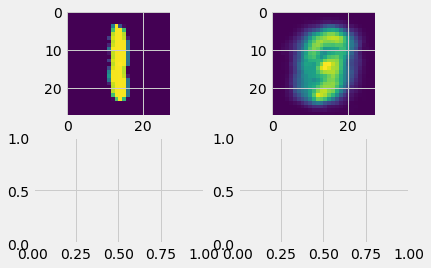